In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [16]:
df=pd.read_csv("D:/Insurance_AI_project/datasets/synthetic_sentiment_data_corrected.csv")

In [17]:
df.head()

,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,"I got what I needed, but it took some effort.",Neutral,3,Support
1,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,972a8469-1641-4f82-8b9d-2434e465e150,The agent was not helpful and lacked knowledge.,Negative,2,Claim
2,17fc695a-07a0-4a6e-8822-e8f36c031199,9a1de644-815e-46d1-bb8f-aa1837f8a88b,"I got what I needed, but it took some effort.",Neutral,3,Claim
3,b74d0fb1-32e7-4629-8fad-c1a606cb0fb3,6b65a6a4-8b81-48f6-b38a-088ca65ed389,"I wouldn't say it's bad, but it could be better.",Neutral,3,Claim
4,47378190-96da-4dac-b2ff-5d2a386ecbe0,c241330b-01a9-471f-9e8a-774bcf36d58b,Super fast and hassle-free claim processing.,Positive,5,Support


In [18]:
df = df.drop(columns=["Sentiment_Label"])


C:\Users\naveen\AppData\Local\Temp\ipykernel_11852\1773344502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', palette='coolwarm')


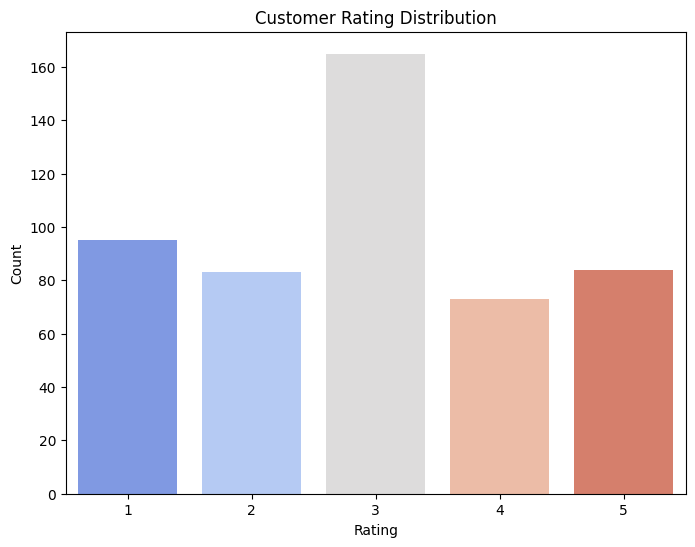

In [19]:
# Plot Rating Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Rating', palette='coolwarm')
plt.title("Customer Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


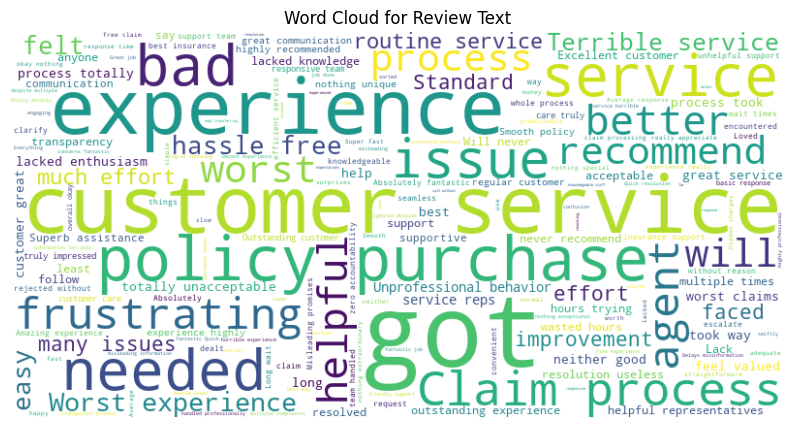

In [20]:
from wordcloud import WordCloud

# Combine all cleaned review text into a single string
all_text = ' '.join(df['Review_Text'].values)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Review Text")
plt.show()


In [21]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [22]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [23]:
# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters, punctuation, numbers
    tokens = word_tokenize(text)  # Tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization & remove stopwords
    return " ".join(tokens)  # Join words back into a single string

In [24]:
# Apply preprocessing
df['Cleaned_Review_Text'] = df['Review_Text'].astype(str).apply(preprocess_text)


In [25]:
df.head()

,Review_ID,Customer_ID,Review_Text,Rating,Service_Type,Cleaned_Review_Text
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,"I got what I needed, but it took some effort.",3,Support,got needed took effort
1,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,972a8469-1641-4f82-8b9d-2434e465e150,The agent was not helpful and lacked knowledge.,2,Claim,agent helpful lacked knowledge
2,17fc695a-07a0-4a6e-8822-e8f36c031199,9a1de644-815e-46d1-bb8f-aa1837f8a88b,"I got what I needed, but it took some effort.",3,Claim,got needed took effort
3,b74d0fb1-32e7-4629-8fad-c1a606cb0fb3,6b65a6a4-8b81-48f6-b38a-088ca65ed389,"I wouldn't say it's bad, but it could be better.",3,Claim,say bad could better
4,47378190-96da-4dac-b2ff-5d2a386ecbe0,c241330b-01a9-471f-9e8a-774bcf36d58b,Super fast and hassle-free claim processing.,5,Support,super fast hassle free claim processing


In [26]:
# Convert rating scores to sentiment labels
def map_sentiment(rating):
    if rating in [1, 2]:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

In [27]:
df['Sentiment_Label'] = df['Rating'].apply(map_sentiment)

In [28]:
df.head()

,Review_ID,Customer_ID,Review_Text,Rating,Service_Type,Cleaned_Review_Text,Sentiment_Label
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,"I got what I needed, but it took some effort.",3,Support,got needed took effort,Neutral
1,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,972a8469-1641-4f82-8b9d-2434e465e150,The agent was not helpful and lacked knowledge.,2,Claim,agent helpful lacked knowledge,Negative
2,17fc695a-07a0-4a6e-8822-e8f36c031199,9a1de644-815e-46d1-bb8f-aa1837f8a88b,"I got what I needed, but it took some effort.",3,Claim,got needed took effort,Neutral
3,b74d0fb1-32e7-4629-8fad-c1a606cb0fb3,6b65a6a4-8b81-48f6-b38a-088ca65ed389,"I wouldn't say it's bad, but it could be better.",3,Claim,say bad could better,Neutral
4,47378190-96da-4dac-b2ff-5d2a386ecbe0,c241330b-01a9-471f-9e8a-774bcf36d58b,Super fast and hassle-free claim processing.,5,Support,super fast hassle free claim processing,Positive


In [29]:
import torch
from transformers import BertTokenizer, BertModel

d:\Insurance_AI_project\myenvv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [31]:
# Function to get BERT embeddings
def get_bert_embeddings(text):
    tokens = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**tokens)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

In [32]:
# Apply BERT feature extraction
df['BERT_Embedding'] = df['Cleaned_Review_Text'].astype(str).apply(get_bert_embeddings)


In [33]:
df.head()

,Review_ID,Customer_ID,Review_Text,Rating,Service_Type,Cleaned_Review_Text,Sentiment_Label,BERT_Embedding
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,"I got what I needed, but it took some effort.",3,Support,got needed took effort,Neutral,"[0.44882786, -0.10706389, 0.125098, 0.17821032..."
1,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,972a8469-1641-4f82-8b9d-2434e465e150,The agent was not helpful and lacked knowledge.,2,Claim,agent helpful lacked knowledge,Negative,"[-0.08798089, -0.008145284, -0.029797815, 0.17..."
2,17fc695a-07a0-4a6e-8822-e8f36c031199,9a1de644-815e-46d1-bb8f-aa1837f8a88b,"I got what I needed, but it took some effort.",3,Claim,got needed took effort,Neutral,"[0.44882786, -0.10706389, 0.125098, 0.17821032..."
3,b74d0fb1-32e7-4629-8fad-c1a606cb0fb3,6b65a6a4-8b81-48f6-b38a-088ca65ed389,"I wouldn't say it's bad, but it could be better.",3,Claim,say bad could better,Neutral,"[0.3070397, 0.012842104, 0.09428597, -0.124903..."
4,47378190-96da-4dac-b2ff-5d2a386ecbe0,c241330b-01a9-471f-9e8a-774bcf36d58b,Super fast and hassle-free claim processing.,5,Support,super fast hassle free claim processing,Positive,"[0.07543326, -0.33579844, 0.21708204, 0.273759..."


In [34]:
# Handle class imbalance using SMOTE
import numpy as np
X = np.stack(df['BERT_Embedding'].values)  # Convert embeddings to numerical array
y = df['Sentiment_Label']

In [35]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

# Encode categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ensure y is defined properly

# Before SMOTE: Check class distribution
print("Class distribution before SMOTE:")
print(Counter(y))  # Instead of df['Sentiment_Label']

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# After SMOTE: Check class distribution
print("\nClass distribution after SMOTE:")
print(Counter(y_resampled))  # Print numerical class counts

# Convert back to categorical labels for readability
y_resampled_labels = label_encoder.inverse_transform(y_resampled)
print("\nClass distribution (labels) after SMOTE:")
print(Counter(y_resampled_labels))  # Now showing categorical labels


Class distribution before SMOTE:
Counter({'Negative': 178, 'Neutral': 165, 'Positive': 157})

Class distribution after SMOTE:
Counter({np.int64(1): 178, np.int64(0): 178, np.int64(2): 178})

Class distribution (labels) after SMOTE:
Counter({'Neutral': 178, 'Negative': 178, 'Positive': 178})


In [36]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Prepare Data: Convert BERT embeddings and labels into tensors
X_resampled_tensor = torch.tensor(X_resampled, dtype=torch.float32)
y_resampled_tensor = torch.tensor(y_resampled, dtype=torch.long)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_tensor, y_resampled_tensor, test_size=0.2, random_state=42)

# Create DataLoaders
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define the Neural Network Model (MLP)
class SentimentModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SentimentModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x  # Return raw logits (no Softmax)

# Initialize the model
model = SentimentModel(input_dim=X_resampled_tensor.shape[1], output_dim=3)  # 3 classes (Negative, Neutral, Positive)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}')

train_model(model, train_loader, criterion, optimizer)

# Evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.append(preds)
            all_labels.append(labels)
    
    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)
    
    # Metrics
    print(classification_report(all_labels.cpu(), all_preds.cpu(), target_names=["Negative", "Neutral", "Positive"]))
    print("Confusion Matrix:")
    print(confusion_matrix(all_labels.cpu(), all_preds.cpu()))

evaluate_model(model, test_loader)


Epoch 1/10, Loss: 0.9834475091525486
Epoch 2/10, Loss: 0.5885929124695914
Epoch 3/10, Loss: 0.26434293974723133
Epoch 4/10, Loss: 0.1304699427315167
Epoch 5/10, Loss: 0.058494782341378074
Epoch 6/10, Loss: 0.02664607816508838
Epoch 7/10, Loss: 0.015097675046750478
Epoch 8/10, Loss: 0.007880217462245907
Epoch 9/10, Loss: 0.005654923867301217
Epoch 10/10, Loss: 0.004801197110542229
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        34
     Neutral       1.00      1.00      1.00        36
    Positive       1.00      1.00      1.00        37

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

Confusion Matrix:
[[34  0  0]
 [ 0 36  0]
 [ 0  0 37]]


In [37]:
# Save the model's state_dict (weights)
torch.save(model.state_dict(), 'sentiment_model.pth')

# Optionally, save the tokenizer as well for BERT
tokenizer.save_pretrained('./tokenizer')


('./tokenizer\\tokenizer_config.json',
 './tokenizer\\special_tokens_map.json',
 './tokenizer\\vocab.txt',
 './tokenizer\\added_tokens.json')

In [38]:
import pickle

# Save the trained model
model_path = "sentiment_model.pkl"
with open(model_path, "wb") as file:
    pickle.dump(model, file)

print(f"Model saved successfully to {model_path}")


Model saved successfully to sentiment_model.pkl


In [39]:
# Load the trained model
with open("sentiment_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [40]:
import torch

# Define the path
model_path = r"D:\Insurance_AI_project\Model\sentiment_mlp_model.pth"

# Save the trained model
torch.save(model.state_dict(), model_path)

print("Model saved successfully!")


Model saved successfully!
